In [20]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [21]:
# Load Data and Preprocess
def load_data(filepath):
    """Load and preprocess the bank marketing dataset."""
    # Load data with semicolon separator
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    """Apply PCA for dimensionality reduction."""
    pca = PCA(n_components=n_components)
    x_pca = pca.fit_transform(x)
    
    # Visualize explained variance
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Component')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")
    
    return x_pca

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    """Find optimal number of clusters using elbow method."""
    from sklearn.cluster import KMeans
    
    inertias = []
    silhouette_scores = []
    K = range(2, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(x, kmeans.labels_))
    
    # Plot elbow curve
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, marker='o', color='orange')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs k')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return inertias

# Perform KMeans Clustering 
def perform_kmeans_clustering(x, n_clusters=3):
    """Perform KMeans clustering."""
    from sklearn.cluster import KMeans
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x)
    
    # Visualize clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolors='black', label='Centroids')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(f'K-Means Clustering (k={n_clusters})')
    plt.legend()
    plt.colorbar(label='Cluster')
    plt.show()
    
    # Print metrics
    print(f"Inertia: {kmeans.inertia_:.2f}")
    print(f"Silhouette Score: {silhouette_score(x, labels):.4f}")
    
    return labels, kmeans

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
def perform_agglomerative_clustering(x, n_clusters=3):
    """Perform Agglomerative clustering."""
    from sklearn.cluster import AgglomerativeClustering
    
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(x)
    
    # Visualize clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='plasma', alpha=0.6)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(f'Agglomerative Clustering (k={n_clusters})')
    plt.colorbar(label='Cluster')
    plt.show()
    
    # Print metrics
    print(f"Silhouette Score: {silhouette_score(x, labels):.4f}")
    
    return labels

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    """Get linkage matrix for dendrogram."""
    from scipy.cluster.hierarchy import linkage
    
    linked = linkage(x, method='ward')
    return linked

# Plot Dendrogram
def plot_dendrogram(linked):
    """Plot dendrogram."""
    from scipy.cluster.hierarchy import dendrogram
    
    plt.figure(figsize=(15, 7))
    dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90)
    plt.xlabel('Sample Index or (Cluster Size)')
    plt.ylabel('Distance')
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.show()


## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

Data shape: (45211, 9)


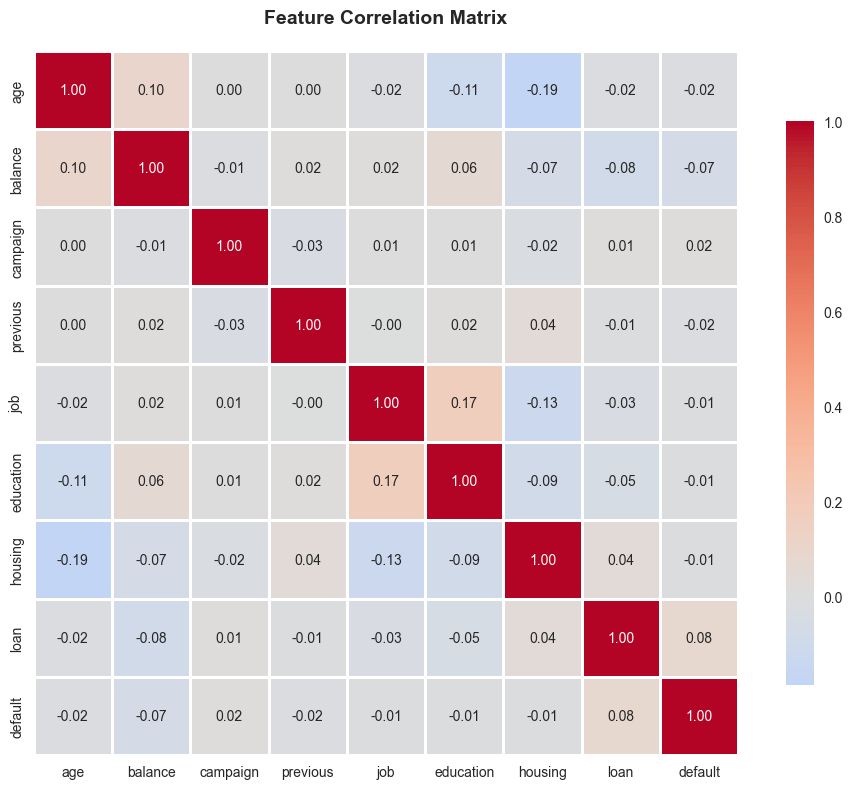


Correlation Matrix:
                age   balance  campaign  previous       job  education  \
age        1.000000  0.097783  0.004760  0.001288 -0.021868  -0.106807   
balance    0.097783  1.000000 -0.014578  0.016674  0.018232   0.064514   
campaign   0.004760 -0.014578  1.000000 -0.032855  0.006839   0.006255   
previous   0.001288  0.016674 -0.032855  1.000000 -0.000911   0.017570   
job       -0.021868  0.018232  0.006839 -0.000911  1.000000   0.166707   
education -0.106807  0.064514  0.006255  0.017570  0.166707   1.000000   
housing   -0.185513 -0.068768 -0.023599  0.037076 -0.125363  -0.090790   
loan      -0.015655 -0.084350  0.009980 -0.011043 -0.033004  -0.048574   
default   -0.017879 -0.066745  0.016822 -0.018329 -0.006853  -0.010718   

            housing      loan   default  
age       -0.185513 -0.015655 -0.017879  
balance   -0.068768 -0.084350 -0.066745  
campaign  -0.023599  0.009980  0.016822  
previous   0.037076 -0.011043 -0.018329  
job       -0.125363 -0.03300

In [22]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Load data with semicolon separator
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

# Display Feature Correlation Matrix
plt.figure(figsize=(10, 8))
features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
           'housing', 'loan', 'default']
correlation_matrix = data[features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)


In [23]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids by randomly picking samples."""
        np.random.seed(self.random_state)
        # Pick random samples as initial centroids
        idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        return X[idx].copy()

    def _assign_clusters(self, X):
        """Find nearest centroid for each point using vectorized operations."""
        # Compute all distances at once using broadcasting
        # X shape: (n_samples, n_features)
        # centroids shape: (n_clusters, n_features)
        # Result shape: (n_samples, n_clusters)
        dist = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(dist, axis=1)

    def _update_centroids(self, X, labels):
        """Calculate new centroids as cluster means."""
        new_centroids = np.empty((self.n_clusters, X.shape[1]))
        
        for k in range(self.n_clusters):
            cluster_mask = (labels == k)
            if cluster_mask.any():
                # Take mean of all points in this cluster
                new_centroids[k] = X[cluster_mask].mean(axis=0)
            else:
                # Empty cluster: randomly reinitialize
                new_centroids[k] = X[np.random.randint(0, X.shape[0])]
        
        return new_centroids

    def fit(self, X):
        """Train K-means by iteratively updating clusters."""
        # Start with random centroids
        self.centroids = self._initialize_centroids(X)
        
        iteration = 0
        while iteration < self.max_iters:
            # Step 1: Assign points to nearest centroid
            self.labels = self._assign_clusters(X)
            
            # Step 2: Update centroid positions
            prev_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X, self.labels)
            
            # Check if converged
            centroid_shift = np.sum((self.centroids - prev_centroids) ** 2)
            if centroid_shift < 1e-8:
                print(f"Converged after {iteration + 1} iterations")
                break
            
            iteration += 1
        
        return self

    def predict(self, X):
        """Predict cluster labels for new data."""
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

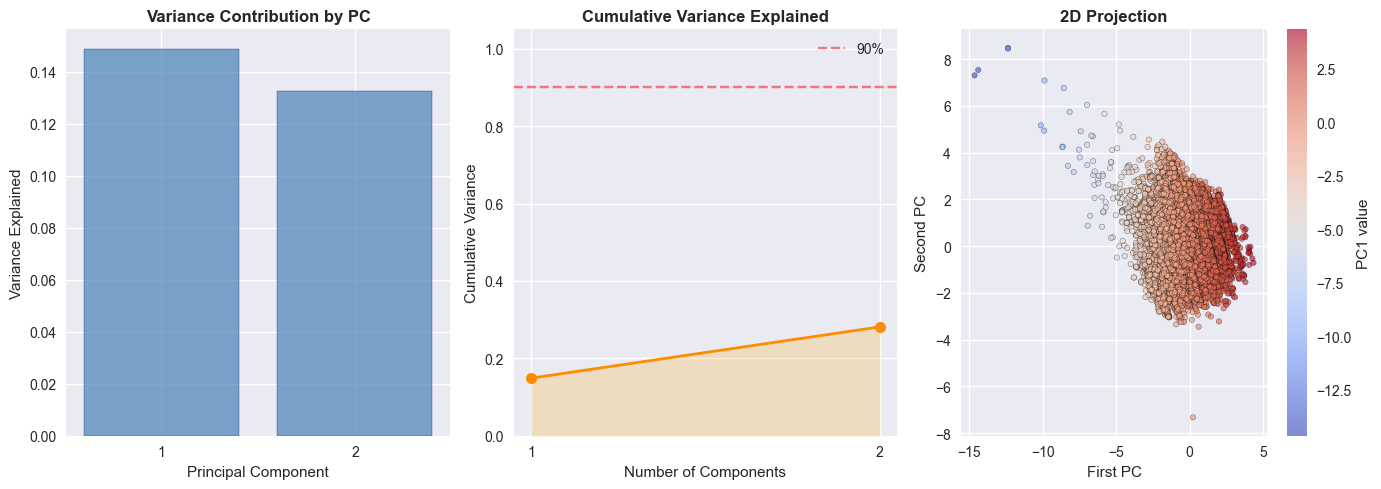

Variance per component: [0.14878447 0.13240902]
Total variance captured: 0.2812
Shape after PCA: (45211, 2)


In [24]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Initialize and fit PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Create visualization with different layout
    fig = plt.figure(figsize=(14, 5))
    
    # Plot 1: Explained variance with different style
    ax1 = plt.subplot(1, 3, 1)
    components_range = np.arange(1, n_components + 1)
    bars = ax1.bar(components_range, pca.explained_variance_ratio_, 
                   color='steelblue', edgecolor='navy', alpha=0.7)
    ax1.set_xlabel('Principal Component', fontsize=11)
    ax1.set_ylabel('Variance Explained', fontsize=11)
    ax1.set_title('Variance Contribution by PC', fontsize=12, fontweight='bold')
    ax1.set_xticks(components_range)
    
    # Plot 2: Cumulative variance with different style
    ax2 = plt.subplot(1, 3, 2)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    ax2.plot(components_range, cumvar, 'o-', color='darkorange', 
             linewidth=2, markersize=8)
    ax2.fill_between(components_range, 0, cumvar, alpha=0.2, color='orange')
    ax2.set_xlabel('Number of Components', fontsize=11)
    ax2.set_ylabel('Cumulative Variance', fontsize=11)
    ax2.set_title('Cumulative Variance Explained', fontsize=12, fontweight='bold')
    ax2.set_xticks(components_range)
    ax2.set_ylim([0, 1.05])
    ax2.axhline(y=0.9, color='red', linestyle='--', alpha=0.5, label='90%')
    ax2.legend()
    
    # Plot 3: 2D scatter with gradient coloring
    ax3 = plt.subplot(1, 3, 3)
    if n_components >= 2:
        scatter = ax3.scatter(X_pca[:, 0], X_pca[:, 1], 
                             c=X_pca[:, 0], cmap='coolwarm', 
                             s=15, alpha=0.6, edgecolors='k', linewidth=0.3)
        ax3.set_xlabel('First PC', fontsize=11)
        ax3.set_ylabel('Second PC', fontsize=11)
        ax3.set_title('2D Projection', fontsize=12, fontweight='bold')
        plt.colorbar(scatter, ax=ax3, label='PC1 value')
    
    plt.tight_layout()
    plt.show()
    
    # Print information
    print(f"Variance per component: {pca.explained_variance_ratio_}")
    print(f"Total variance captured: {sum(pca.explained_variance_ratio_):.4f}")
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Converged after 2 iterations
Converged after 31 iterations
Converged after 31 iterations
Converged after 27 iterations
Converged after 27 iterations
Converged after 25 iterations
Converged after 25 iterations
Converged after 34 iterations
Converged after 34 iterations
Converged after 24 iterations
Converged after 24 iterations
Converged after 99 iterations
Converged after 99 iterations
Converged after 35 iterations
Converged after 35 iterations
Converged after 70 iterations
Converged after 70 iterations
Converged after 69 iterations
Converged after 69 iterations


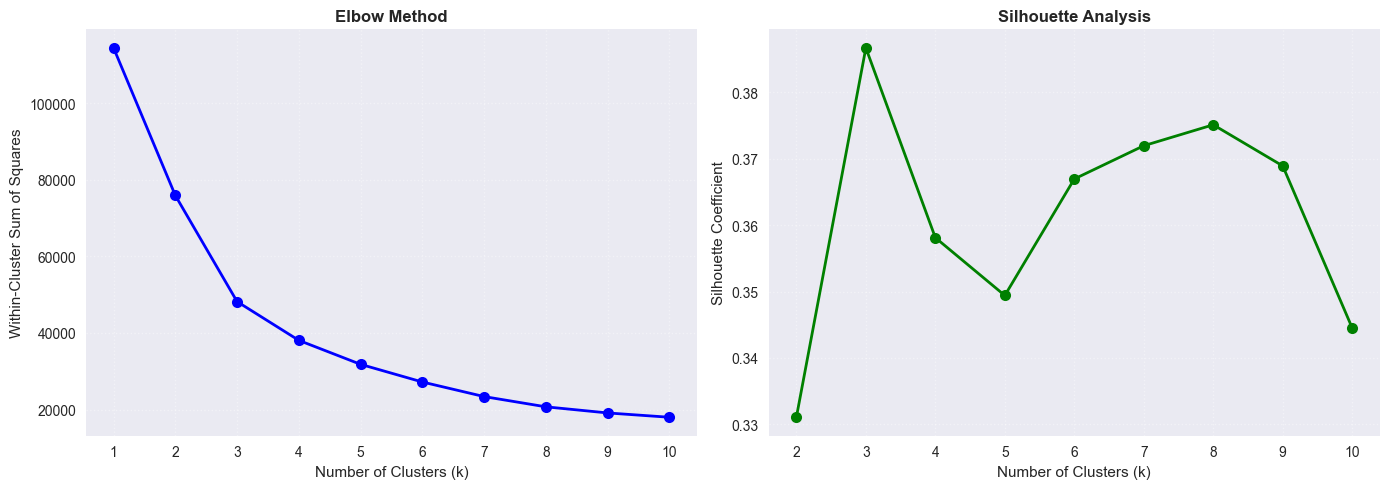

Converged after 27 iterations


C:\Users\Chetan\AppData\Local\Temp\ipykernel_13424\260544481.py:118: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(cluster_silhouettes, labels=unique_labels, patch_artist=True,


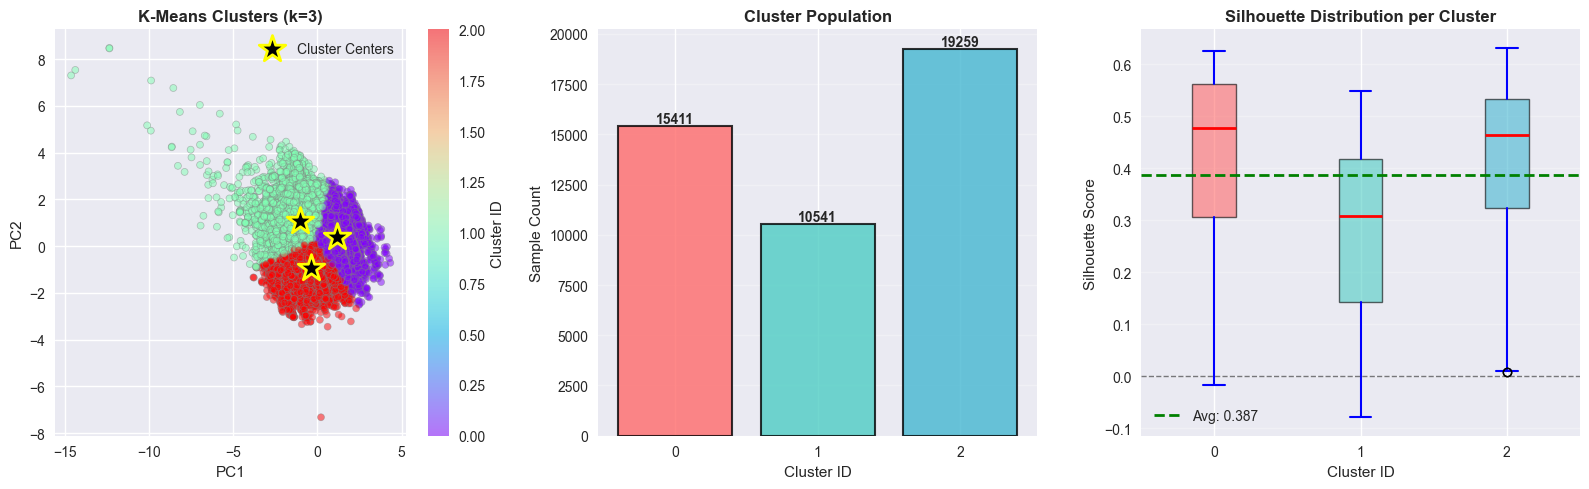


         CLUSTERING PERFORMANCE METRICS
Clusters formed: 3
Inertia (WCSS): 48179.64
Silhouette Score: 0.3867

Cluster Distribution:
  → Cluster 0: 15411 samples (34.1%)
  → Cluster 1: 10541 samples (23.3%)
  → Cluster 2: 19259 samples (42.6%)


In [25]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    total_inertia = 0.0
    
    # Loop through each cluster
    for cluster_idx in range(len(centroids)):
        # Get points belonging to this cluster
        points_in_cluster = X[labels == cluster_idx]
        
        # Calculate squared distance from centroid
        if len(points_in_cluster) > 0:
            squared_dists = np.sum((points_in_cluster - centroids[cluster_idx]) ** 2, axis=1)
            total_inertia += np.sum(squared_dists)
    
    return total_inertia

def plot_elbow_curve(X, max_k=10):
    """Create elbow plot to identify optimal cluster count."""
    wcss_values = []
    sil_scores = []
    k_values = list(range(1, max_k + 1))
    
    # Test different k values
    for num_clusters in k_values:
        if num_clusters == 1:
            model = KMeansClustering(n_clusters=num_clusters)
            model.fit(X)
            wcss = calculate_inertia(X, model.labels, model.centroids)
            wcss_values.append(wcss)
        else:
            model = KMeansClustering(n_clusters=num_clusters)
            model.fit(X)
            wcss = calculate_inertia(X, model.labels, model.centroids)
            wcss_values.append(wcss)
            sil_scores.append(silhouette_score(X, model.labels))
    
    # Create visualization with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Elbow plot
    ax1.plot(k_values, wcss_values, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Number of Clusters (k)', fontsize=11)
    ax1.set_ylabel('Within-Cluster Sum of Squares', fontsize=11)
    ax1.set_title('Elbow Method', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.4, linestyle=':')
    ax1.set_xticks(k_values)
    
    # Silhouette plot
    ax2.plot(range(2, max_k + 1), sil_scores, 'go-', linewidth=2, markersize=8)
    ax2.set_xlabel('Number of Clusters (k)', fontsize=11)
    ax2.set_ylabel('Silhouette Coefficient', fontsize=11)
    ax2.set_title('Silhouette Analysis', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.4, linestyle=':')
    ax2.set_xticks(range(2, max_k + 1))
    
    plt.tight_layout()
    plt.show()
    
    return wcss_values

# Generate elbow curve
inertias = plot_elbow_curve(X_pca)

# Perform clustering with chosen k
optimal_k = 3
kmeans = KMeansClustering(n_clusters=optimal_k)
kmeans.fit(X_pca)

# Create comprehensive visualization
fig = plt.figure(figsize=(16, 5))

# Subplot 1: Cluster visualization
ax1 = plt.subplot(1, 3, 1)
colors = kmeans.labels
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, 
                     cmap='rainbow', alpha=0.5, s=25, edgecolors='gray', linewidth=0.5)
ax1.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
           c='black', marker='*', s=400, edgecolors='yellow', 
           linewidths=2, label='Cluster Centers')
ax1.set_xlabel('PC1', fontsize=11)
ax1.set_ylabel('PC2', fontsize=11)
ax1.set_title(f'K-Means Clusters (k={optimal_k})', fontsize=12, fontweight='bold')
ax1.legend()
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Cluster ID')

# Subplot 2: Cluster population
ax2 = plt.subplot(1, 3, 2)
unique_labels, label_counts = np.unique(kmeans.labels, return_counts=True)
colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1'][:optimal_k]
bars = ax2.bar(unique_labels, label_counts, color=colors_bar, 
              edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_xlabel('Cluster ID', fontsize=11)
ax2.set_ylabel('Sample Count', fontsize=11)
ax2.set_title('Cluster Population', fontsize=12, fontweight='bold')
ax2.set_xticks(unique_labels)
ax2.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for bar, count in zip(bars, label_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Subplot 3: Silhouette distribution per cluster (Box Plot)
from sklearn.metrics import silhouette_samples

ax3 = plt.subplot(1, 3, 3)
silhouette_vals = silhouette_samples(X_pca, kmeans.labels)

# Prepare data for box plot
cluster_silhouettes = []
for cluster_id in range(optimal_k):
    cluster_sil_values = silhouette_vals[kmeans.labels == cluster_id]
    cluster_silhouettes.append(cluster_sil_values)

# Create box plot
bp = ax3.boxplot(cluster_silhouettes, labels=unique_labels, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='blue', linewidth=1.5),
                  capprops=dict(color='blue', linewidth=1.5))

# Color each box differently
box_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1'][:optimal_k]
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax3.axhline(y=silhouette_value, color='green', linestyle='--', 
           linewidth=2, label=f'Avg: {silhouette_value:.3f}')
ax3.set_xlabel('Cluster ID', fontsize=11)
ax3.set_ylabel('Silhouette Score', fontsize=11)
ax3.set_title('Silhouette Distribution per Cluster', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print metrics
inertia_value = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette_value = silhouette_score(X_pca, kmeans.labels)

print("\n" + "="*55)
print("         CLUSTERING PERFORMANCE METRICS")
print("="*55)
print(f"Clusters formed: {optimal_k}")
print(f"Inertia (WCSS): {inertia_value:.2f}")
print(f"Silhouette Score: {silhouette_value:.4f}")
print("\nCluster Distribution:")
for idx, count in enumerate(label_counts):
    percentage = (count / len(kmeans.labels)) * 100
    print(f"  → Cluster {idx}: {count} samples ({percentage:.1f}%)")
print("="*55)


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

Running Bisecting K-Means Algorithm...


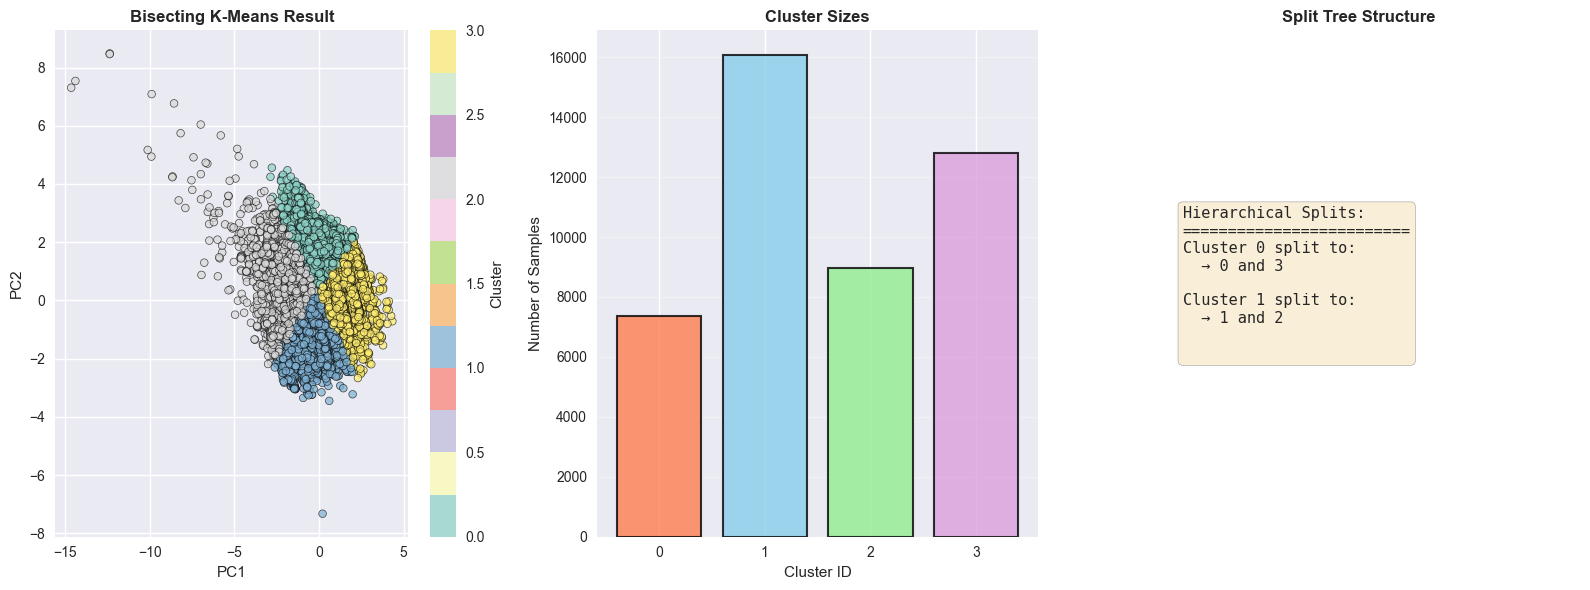


Bisecting K-Means Silhouette Score: 0.3607
Total clusters created: 4

Cluster breakdown:
  Cluster 0: 7355 samples (16.3%)
  Cluster 1: 16090 samples (35.6%)
  Cluster 2: 8962 samples (19.8%)
  Cluster 3: 12804 samples (28.3%)


In [26]:
class BisectingKMeans:
    """Bisecting K-means implementation - hierarchical clustering approach."""
    
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively split clusters until target number reached."""
        from sklearn.cluster import KMeans
        
        n_samples = X.shape[0]
        
        # Start: everyone in cluster 0
        self.labels_ = np.zeros(n_samples, dtype=int)
        label_counter = 1
        
        # Store initial center
        self.centers_[0] = np.mean(X, axis=0)
        
        # Keep splitting until we have enough clusters
        while np.unique(self.labels_).size < self.n_clusters:
            # Find which cluster has most points
            labels_unique, label_counts = np.unique(self.labels_, return_counts=True)
            biggest_cluster = labels_unique[np.argmax(label_counts)]
            
            # Get data points in biggest cluster
            mask = (self.labels_ == biggest_cluster)
            cluster_data = X[mask]
            
            # Split into 2 sub-clusters
            km = KMeans(n_clusters=2, random_state=self.random_state + label_counter, n_init=10)
            sub_cluster_labels = km.fit_predict(cluster_data)
            
            # Update labels
            point_indices = np.where(mask)[0]
            for i, sub_label in enumerate(sub_cluster_labels):
                if sub_label == 1:
                    self.labels_[point_indices[i]] = label_counter
            
            # Record the split
            self.split_tree[biggest_cluster] = (biggest_cluster, label_counter)
            
            # Save centroids
            self.centers_[biggest_cluster] = km.cluster_centers_[0]
            self.centers_[label_counter] = km.cluster_centers_[1]
            
            label_counter += 1
        
        return self.labels_

# Test Bisecting K-Means
print("Running Bisecting K-Means Algorithm...")
bisect_model = BisectingKMeans(n_clusters=4, random_state=42)
bisect_labels = bisect_model.fit_predict(X_pca)

# Visualization
fig = plt.figure(figsize=(16, 6))

# Plot 1: Cluster scatter
ax1 = plt.subplot(1, 3, 1)
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=bisect_labels, cmap='Set3', 
                     s=30, alpha=0.7, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('PC1', fontsize=11)
ax1.set_ylabel('PC2', fontsize=11)
ax1.set_title('Bisecting K-Means Result', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax1, label='Cluster')

# Plot 2: Size comparison
ax2 = plt.subplot(1, 3, 2)
unique_bisect, counts_bisect = np.unique(bisect_labels, return_counts=True)
ax2.bar(unique_bisect, counts_bisect, 
       color=['coral', 'skyblue', 'lightgreen', 'plum'][:len(unique_bisect)],
       edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_xlabel('Cluster ID', fontsize=11)
ax2.set_ylabel('Number of Samples', fontsize=11)
ax2.set_title('Cluster Sizes', fontsize=12, fontweight='bold')
ax2.set_xticks(unique_bisect)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Split hierarchy
ax3 = plt.subplot(1, 3, 3)
split_text = "Hierarchical Splits:\n" + "="*25 + "\n"
for parent_id, (left_id, right_id) in bisect_model.split_tree.items():
    split_text += f"Cluster {parent_id} split to:\n"
    split_text += f"  → {left_id} and {right_id}\n\n"
ax3.text(0.1, 0.5, split_text, fontsize=11, 
        verticalalignment='center', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')
ax3.set_title('Split Tree Structure', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Metrics
bisect_sil = silhouette_score(X_pca, bisect_labels)
print(f"\nBisecting K-Means Silhouette Score: {bisect_sil:.4f}")
print(f"Total clusters created: {len(unique_bisect)}")
print("\nCluster breakdown:")
for lbl, cnt in zip(unique_bisect, counts_bisect):
    print(f"  Cluster {lbl}: {cnt} samples ({cnt/len(bisect_labels)*100:.1f}%)")


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!